In [75]:
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

In [76]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


## Linear Regression

In [84]:
fileURL = "iris.data"
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'] , header=None)
iris = iris.dropna()

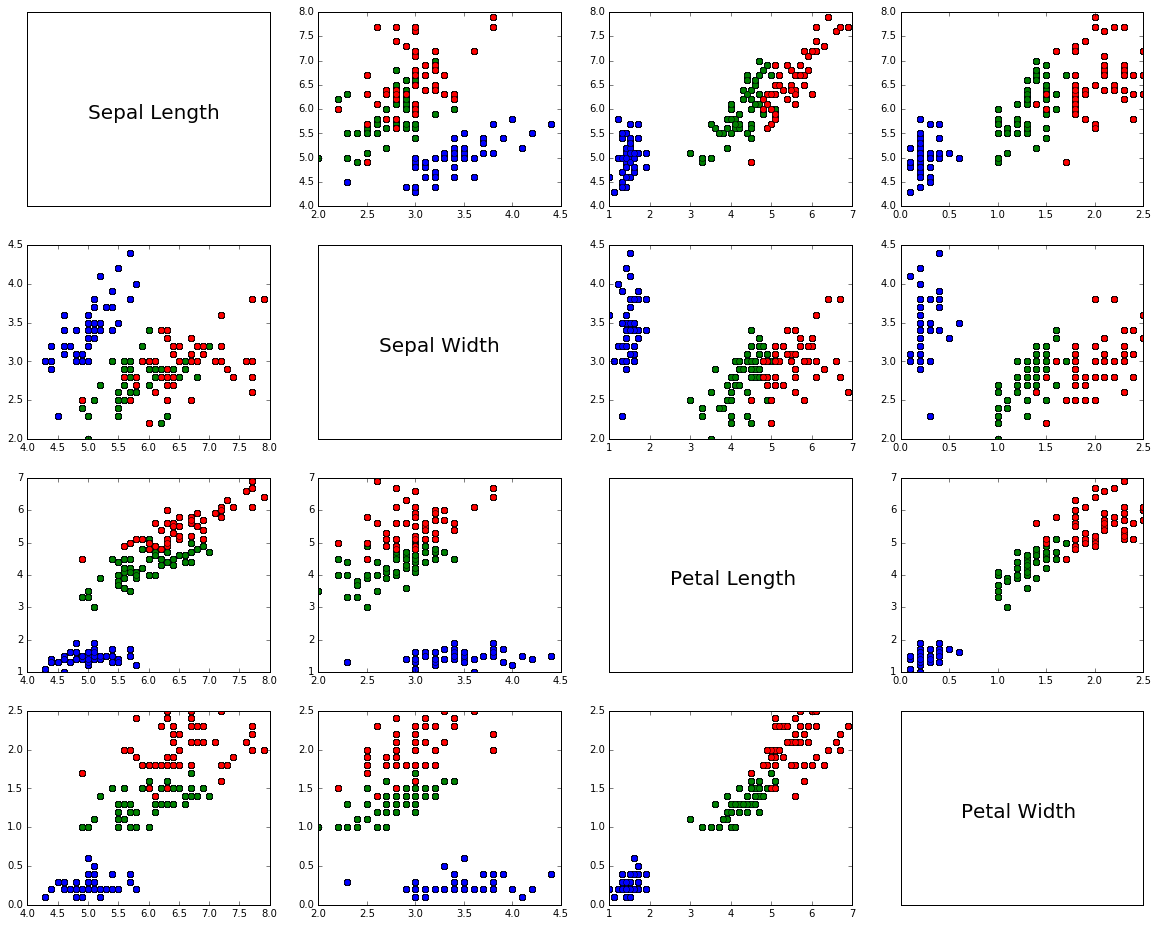

In [85]:
pairs(iris)

In [122]:
iris = datasets.load_iris()
iris_sepal_length = iris.data[:, np.newaxis, 0]
iris_sepal_width = iris.data[:, np.newaxis, 1]
iris_petal_length = iris.data[:, np.newaxis, 2]
iris_petal_width = iris.data[:, np.newaxis, 3]

In [132]:
sepal_length_training, sepal_length_testing, iris_Y_training, iris_Y_testing = train_test_split(iris_sepal_length, iris.target, test_size=0.33, random_state=42)
sepal_width_training, sepal_width_testing, iris_Y_training, iris_Y_testing = train_test_split(iris_sepal_width, iris.target, test_size=0.33, random_state=42)
petal_length_training, petal_length_testing, iris_Y_training, iris_Y_testing = train_test_split(iris_petal_length, iris.target, test_size=0.33, random_state=42)
petal_width_training, petal_width_testing, iris_Y_training, iris_Y_testing = train_test_split(iris_petal_width, iris.target, test_size=0.33, random_state=42)

regr = linear_model.LinearRegression()

In [151]:
regr.fit(sepal_length_training, iris_Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients: 
 [ 1.02988776]
Mean squared error: 24.37
Variance score: -34.00


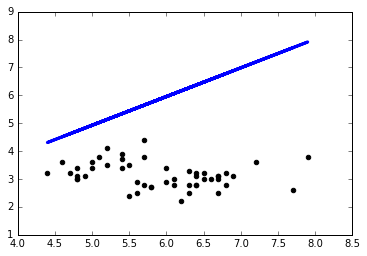

In [169]:
plt.scatter(sepal_length_testing, sepal_width_testing,  color='black')
plt.plot(sepal_length_testing, regr.predict(sepal_length_testing), color='blue',linewidth=3)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_length_testing) - iris_Y_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_length_testing, iris_Y_testing))

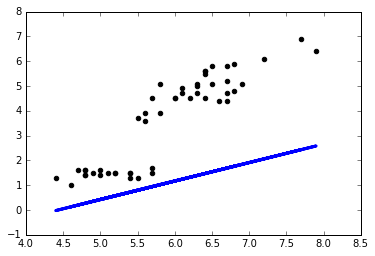

In [153]:
plt.scatter(sepal_length_testing, petal_length_testing, color='black')
plt.plot(sepal_length_testing, regr.predict(sepal_length_testing), color='blue',linewidth=3)

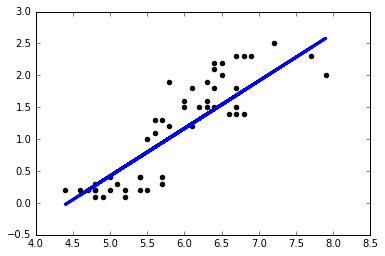

In [154]:
plt.scatter(sepal_length_testing, petal_width_testing,color='black')
plt.plot(sepal_length_testing, regr.predict(sepal_length_testing), color='blue',linewidth=3)

In [155]:
regr.fit(sepal_width_training, iris_Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

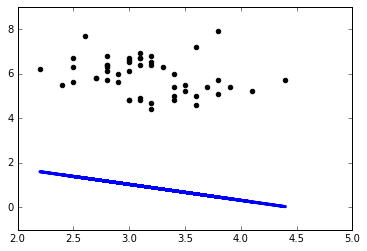

In [156]:
plt.scatter(sepal_width_testing, sepal_length_testing,  color='black')
plt.plot(sepal_width_testing, regr.predict(sepal_width_testing), color='blue',linewidth=3)

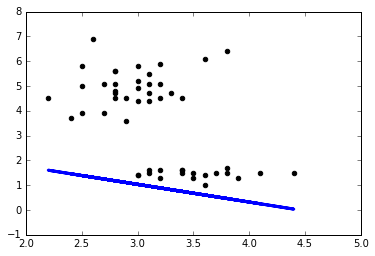

In [158]:
plt.scatter(sepal_width_testing, petal_length_testing,  color='black')
plt.plot(sepal_width_testing, regr.predict(sepal_width_testing), color='blue',linewidth=3)

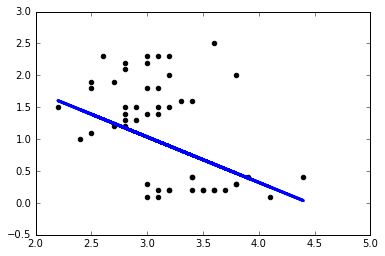

In [159]:
plt.scatter(sepal_width_testing, petal_width_testing,  color='black')
plt.plot(sepal_width_testing, regr.predict(sepal_width_testing), color='blue',linewidth=3)

In [160]:
regr.fit(petal_length_training, iris_Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

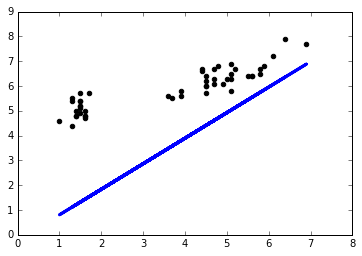

In [147]:
plt.scatter(petal_length_testing, sepal_length_testing,  color='black')
plt.plot(petal_length_testing, regr.predict(petal_length_testing), color='blue',linewidth=3)

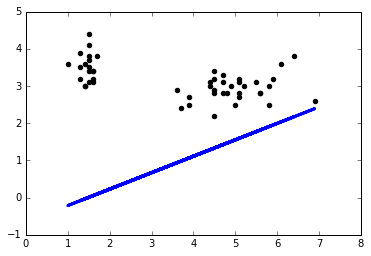

In [161]:
plt.scatter(petal_length_testing, sepal_width_testing,  color='black')
plt.plot(petal_length_testing, regr.predict(petal_length_testing), color='blue',linewidth=3)

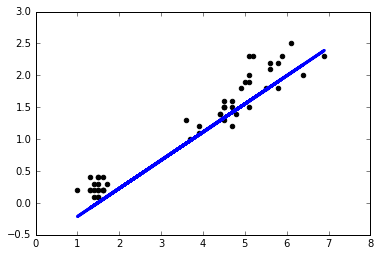

In [162]:
plt.scatter(petal_length_testing, petal_width_testing,  color='black')
plt.plot(petal_length_testing, regr.predict(petal_length_testing), color='blue',linewidth=3)

In [163]:
regr.fit(petal_width_training, iris_Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

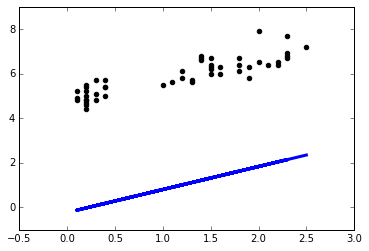

In [164]:
plt.scatter(petal_width_testing, sepal_length_testing,  color='black')
plt.plot(petal_width_testing, regr.predict(petal_width_testing), color='blue',linewidth=3)

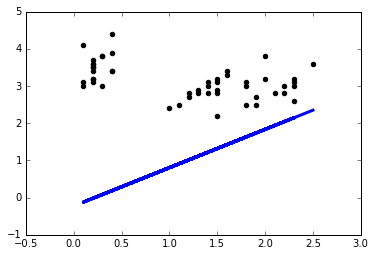

In [165]:
plt.scatter(petal_width_testing, sepal_width_testing,  color='black')
plt.plot(petal_width_testing, regr.predict(petal_width_testing), color='blue',linewidth=3)

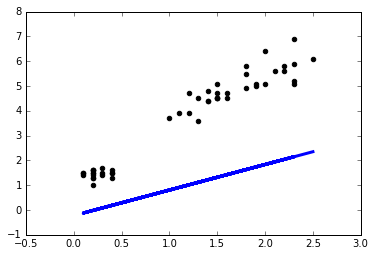

In [166]:
plt.scatter(petal_width_testing, petal_length_testing,  color='black')
plt.plot(petal_width_testing, regr.predict(petal_width_testing), color='blue',linewidth=3)